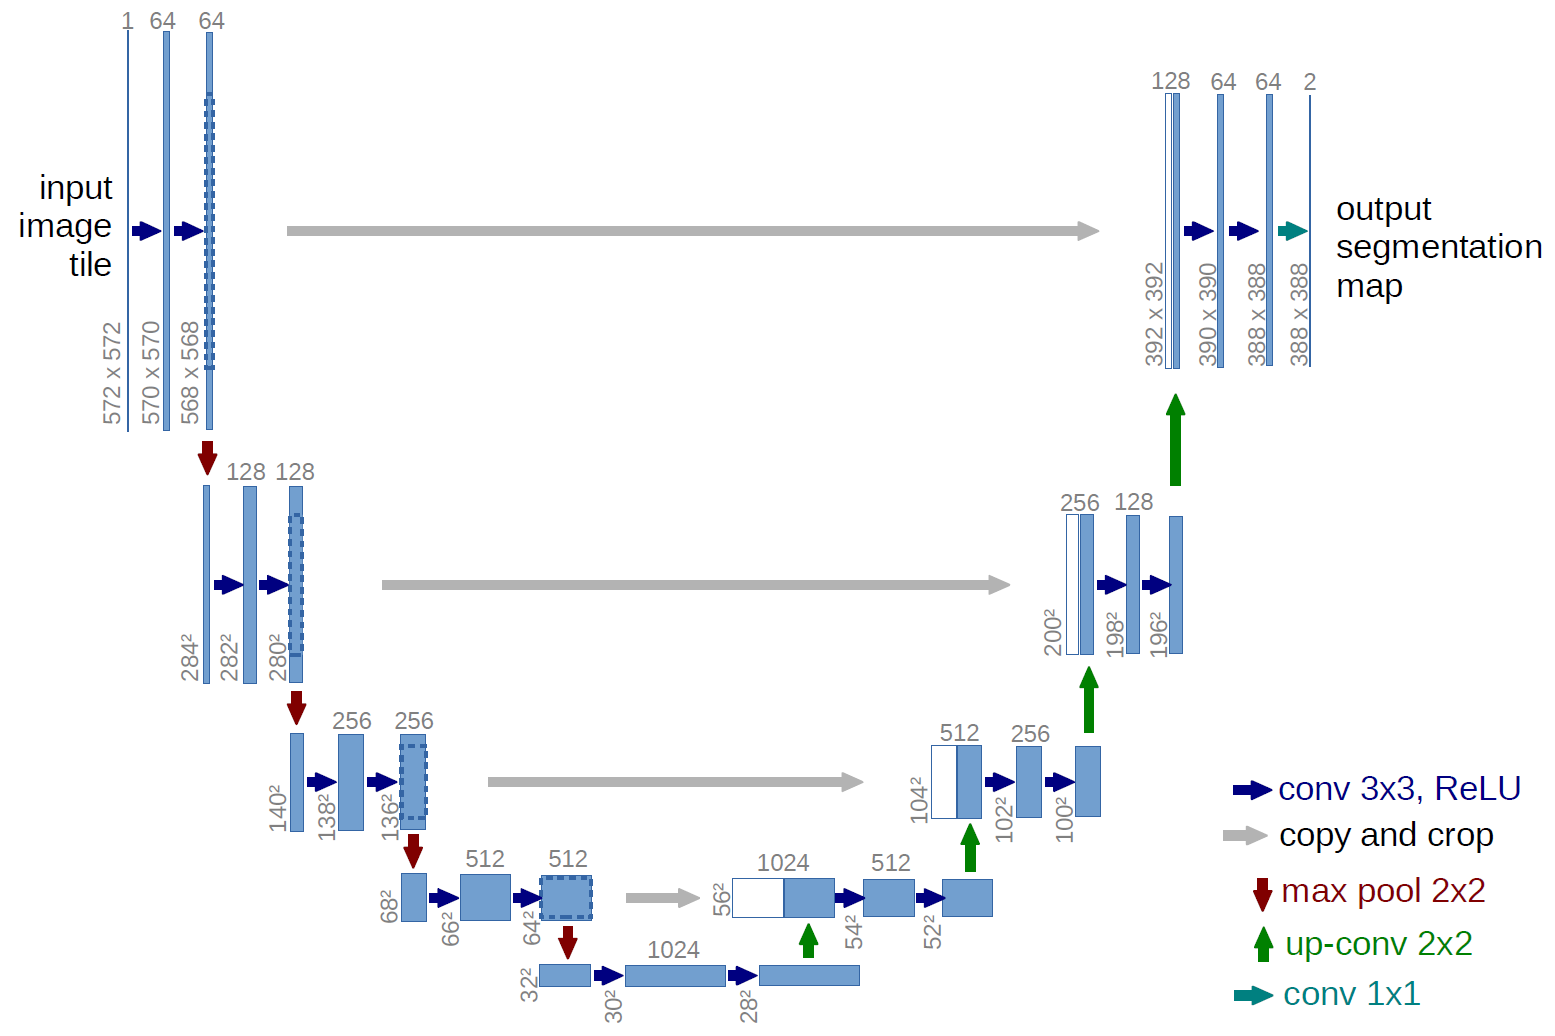

# اتصال گوگل کولب

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# خواندن اطلاعات

In [2]:
import cv2
import numpy as np
import glob

width=128
height=128
images_path = '/content/drive/My Drive/DataSet/Mamographi/x_train/'
images = glob.glob(images_path + "*.bmp") + glob.glob(images_path + "*.bmp")
images.sort()

Train_Image=[]
for img in images:
  print(img)
  im=cv2.imread(img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  im=cv2.resize(im,(width,height))
  Train_Image.append(im)

Train_Lable=[]
images_path = '/content/drive/My Drive/DataSet/Mamographi/y_train/'
images = glob.glob(images_path + "*.bmp") + glob.glob(images_path + "*.bmp")
images.sort()
for img in images:
  print(img)
  im=cv2.imread(img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  im=cv2.resize(im,(width,height))
  Train_Lable.append(im)

/content/drive/My Drive/DataSet/Mamographi/x_train/IMD002.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD002.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD003.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD003.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD004.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD004.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD006.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD006.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD008.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD008.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD009.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD009.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD010.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD010.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD013.bmp
/content/drive/My Drive/DataSet/Mamographi/x_train/IMD013.bmp
/content

In [3]:
Train_Image = np.reshape(Train_Image, (len(Train_Image), 128, 128, 3))  # adapt this if using `channels_first` image data format
Train_Lable = np.reshape(Train_Lable, (len(Train_Lable), 128, 128, 1))  # adapt this if using `channels_first` image data format

In [4]:
import keras

In [5]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [6]:
def UNet():
    image_size=128
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [7]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

In [8]:
model.fit(Train_Image, Train_Lable,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(Train_Image, Train_Lable))

Epoch 1/5
40/40 [==============================] - 140s 3s/step - loss: nan - acc: 0.1050 - val_loss: nan - val_acc: 0.6755
Epoch 2/5
40/40 [==============================] - 114s 3s/step - loss: nan - acc: 0.6755 - val_loss: nan - val_acc: 0.6755
Epoch 3/5
40/40 [==============================] - 133s 3s/step - loss: nan - acc: 0.6755 - val_loss: nan - val_acc: 0.6755
Epoch 4/5
40/40 [==============================] - 138s 4s/step - loss: nan - acc: 0.6755 - val_loss: nan - val_acc: 0.6755
Epoch 5/5
40/40 [==============================] - 114s 3s/step - loss: nan - acc: 0.6755 - val_loss: nan - val_acc: 0.6755


13/13 [==============================] - 24s 2s/step


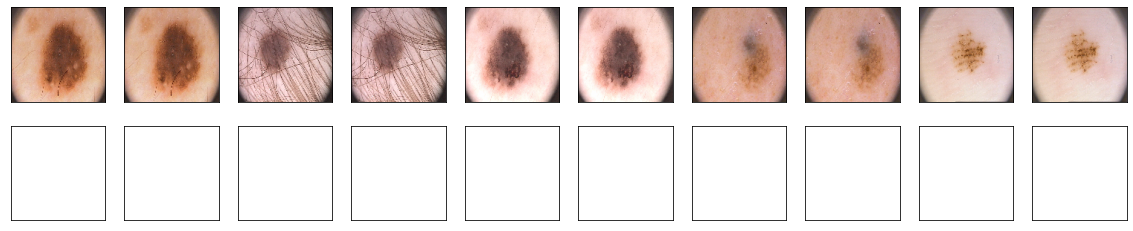

In [9]:
import matplotlib.pyplot as plt

decoded_imgs = model.predict(Train_Image)

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(Train_Image[i].reshape(128, 128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()